In [3]:
%pip install numpy pandas matplotlib seaborn scikit-learn

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris

In [14]:
iris = load_iris()
X = iris.data
y = iris.target

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [16]:
k = 5
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [18]:
y_pred = knn.predict(X_test)

In [19]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy score of the model with k={k}: {accuracy:.2f}")

Accuracy score of the model with k=5: 1.00


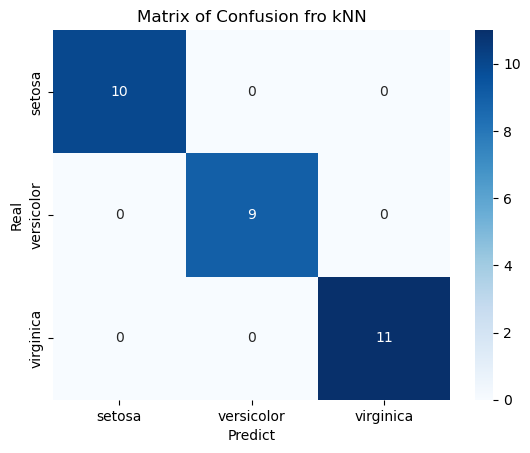

In [22]:
confus_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confus_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predict")
plt.ylabel("Real")
plt.title("Matrix of Confusion fro kNN")
plt.show()

In [23]:
print(classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# K-Nearest Neighbors (kNN)
## What is kNN?

**Supervised Machine Learning** algorithm used for **classification and regression**.
- For **classification**, it assigns the **most frequent** class among the k nearest neighbors.
- For **regression**, it **predicts a continuous value** based on the mean or median of the neighbors' values.

## Effect of the value of K:
1. **K too small** → Overfitting, the model is too sensitive to noise.
2. **K too large** → Underfitting, the model becomes too generalized and inaccurate.

## How does prediction work?

It takes the **highest number** of votes among the **k points closest** to the observation to be classified.